In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn
import datetime as dt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
retail_df = pd.read_csv('../kaggleOnlineRetail/OnlineRetail.csv', encoding="ISO-8859-1", sep = ',', header = 0)
print(f'Shape : {retail_df.shape}')
print(retail_df.info())

Shape : (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


# 1. Clean & improve data

In [3]:
# drop all rows with null values
print(retail_df.isnull().sum()) 
retail_df = retail_df.dropna()
retail_df.shape

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


(406829, 8)

In [4]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


### Descriptive values
>It can be seen that there is a 'UnitPrice' and 'Quantity', but there isn't a total amount column. We need a new *df* that contains the amount of money that every customer (*'CustomerID'*) spent. Those things will be useful in the future since we are using **RFM Clustering**.

> Another thing i will do is set InvoiceDate as a date_time data type         

In [5]:
# Amount column (quantity * unitPrice)
retail_df['amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [6]:
# Transfor to InvoiceDate to date_time data type
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')
retail_df 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


# 2. Important data features for modelling
In this step I will elaborate new dataframes that could be useful for modelling.
> Since the ***bussines goal*** is to use RFM clustering, we have to use recency, frequency, monetary values to clustering process:
> 1. Recency: Recency of purchase
> 2. Monetary: Monetary value of purchase
> 3. Frequency: Frequency of purchase. <br>
> *[RFM information](https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp)*

##### Amount of money every customer spent (Monetary)
> Monetary value stems from the lucrativeness of expenditures the customer makes with the business during their transactions. A natural inclination is to put more emphasis on encouraging customers who spend the most money to continue to do so. That will be useful because of two things: <br>
> 1. Can produce a better return on investment in marketing and customer service.
> 2. Companies runs the risk of alienating customers who have been consistent but have not spent as much with each transaction. That is why we have to relate monetary and recency values.



In [7]:
customerTotal_df = retail_df.groupby('CustomerID')['amount'].sum()
customerTotal_df = customerTotal_df.reset_index()
customerTotal_df

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


##### Frecuency of customers
> The frequency of a customer’s transactions may be affected by factors such as the type of product, the price point for the purchase, and the need for replenishment or replacement. If the purchase cycle can be predicted, for example when a customer needs to buy new groceries, marketing efforts could be directed towards reminding them to visit the business when items such as eggs or milk have been depleted.

In [8]:
# We count the amount of transactions of every single customer (grouped by 'CustomerID')
customerFrequency_df = retail_df.groupby('CustomerID')['InvoiceNo'].count()
customerFrequency_df = customerFrequency_df.reset_index()
customerFrequency_df.columns = ['CustomerID', 'Frequency']
customerFrequency_df

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


#### Merge customerFrequency_df and customerTotal_df
````Python 
DataFrame.merge(right, how='inner', on=None, ...)
````
> * *right*: DataFrame or named Series. Object to merge with. <br>
> * *how*: {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’. Type of merge to be performed. Similar to SQL joins. <br>
> * *on*: label or list. Column or index level names to join on. These must be found in both DataFrames. If on is None and not merging on indexes then this defaults to the intersection of the columns in both DataFrames.<br>

[Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge)

In [9]:
grouped_df = pd.merge(customerFrequency_df, customerTotal_df, on = 'CustomerID')
grouped_df

,CustomerID,Frequency,amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40
...,...,...,...
4367,18280.0,10,180.60
4368,18281.0,7,80.82
4369,18282.0,13,176.60
4370,18283.0,756,2094.88


#### Customer recency
> Evaluates customer-company engagement.<br>The more recently a customer has made a purchase with a company, the more likely he or she will continue to keep the business and brand in mind for subsequent purchases. Compared with customers who have not bought from the business in months or even longer periods, the likelihood of engaging in future transactions with recent customers is arguably higher. <br><br>
> ***Intuitive explanation***: *if a customer bought something far from now, it is not likely he is coming back to the store. But if there is a customer that recently bought, he is a potenitial loyal customer*.

In [10]:
# Latest purchase
latestPurchase = max(retail_df['InvoiceDate'])
latestPurchase

Timestamp('2011-12-09 12:50:00')

In [11]:
# Calculate the rececny of each transaction
retail_df['transactionRecency'] = latestPurchase - retail_df['InvoiceDate']
lastPurchase_df = retail_df.groupby('CustomerID')['transactionRecency'].min().reset_index()

lastPurchase_df['transactionRecency'] = lastPurchase_df['transactionRecency'].dt.days
lastPurchase_df

,CustomerID,transactionRecency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [12]:
# Merge frecuency and money data frame with transactionRecency
grouped_df = pd.merge(grouped_df, lastPurchase_df, on = 'CustomerID')
grouped_df

,CustomerID,Frequency,amount,transactionRecency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
...,...,...,...,...
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7
4370,18283.0,756,2094.88,3


# 3. Outlier managment


In [ ]:
fig = px.scatter(x=grouped_df['transactionRecency'], y=grouped_df['Frequency'])
fig.show()

fig = px.scatter(x=grouped_df['amount'], y=grouped_df['Frequency'])
fig.show()

fig = px.scatter(x=grouped_df['transactionRecency'], y=grouped_df['amount'])
fig.show()
# red dashes, blue squares and green triangles
# plt.scatter('amount', 'transactionRecency', data = grouped_df, linewidths = 0.4)
# plt.show()

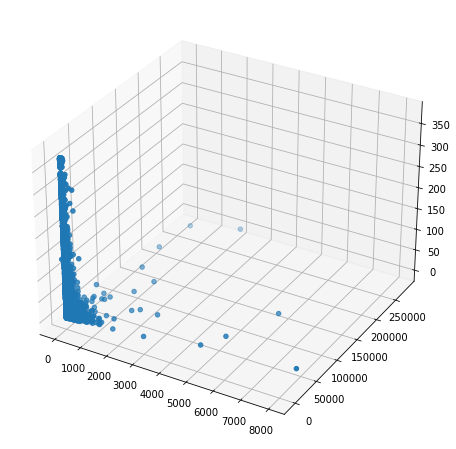

In [28]:
fig = plt.figure(figsize = [8,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grouped_df['Frequency'], grouped_df['amount'], grouped_df['transactionRecency'])